In [1]:
import warnings
import itertools

import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('bmh')

In [2]:
from io import StringIO
import requests

url = 'http://www.ucanalytics.com/blogs/wp-content/uploads/2015/06/Tractor-Sales.csv'
s = requests.get(url).text

sales_data = pd.read_csv(StringIO(s))
sales_data.head(5)

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [3]:
# since the complete date was not mentioned, we assume that it was the first of every month
dates = pd.date_range(start='2003-01-01', freq='MS', periods=len(sales_data))

In [4]:
dates

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [5]:
import calendar
sales_data['Month'] = dates.month
sales_data['Month'] = sales_data['Month'].apply(lambda x: calendar.month_abbr[x])
sales_data['Year'] = dates.year

In [6]:
sales_data.drop(['Month-Year'], axis=1, inplace=True)
sales_data.rename(columns={'Number of Tractor Sold':'Tractor-Sales'}, inplace=True)#Column renaming
sales_data = sales_data[['Month', 'Year', 'Tractor-Sales']]

In [7]:
# set the dates as the index of the dataframe, so that it can be treated as a time-series dataframe
sales_data.set_index(dates, inplace=True)

In [8]:
# check out first 5 samples of the data
sales_data.head(5)

,Month,Year,Tractor-Sales
2003-01-01,Jan,2003,141
2003-02-01,Feb,2003,157
2003-03-01,Mar,2003,185
2003-04-01,Apr,2003,199
2003-05-01,May,2003,203


In [9]:
# extract out the time-series
sales_ts = sales_data['Tractor-Sales']

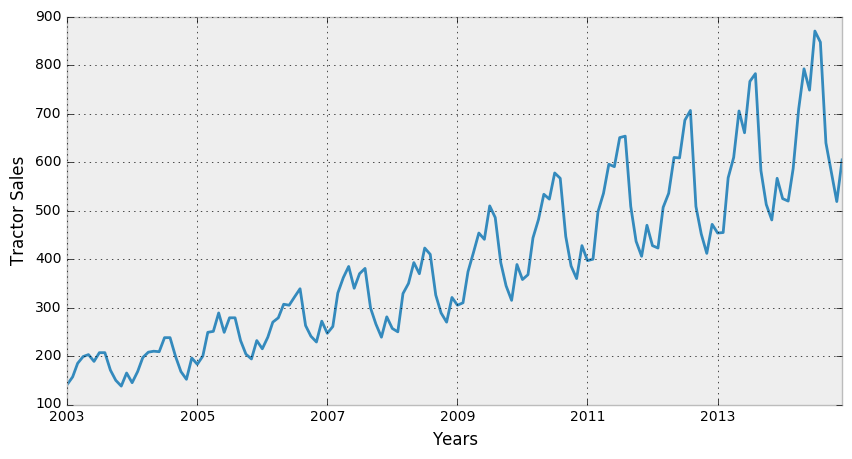

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(sales_ts)
plt.xlabel('Years')
plt.ylabel('Tractor Sales')

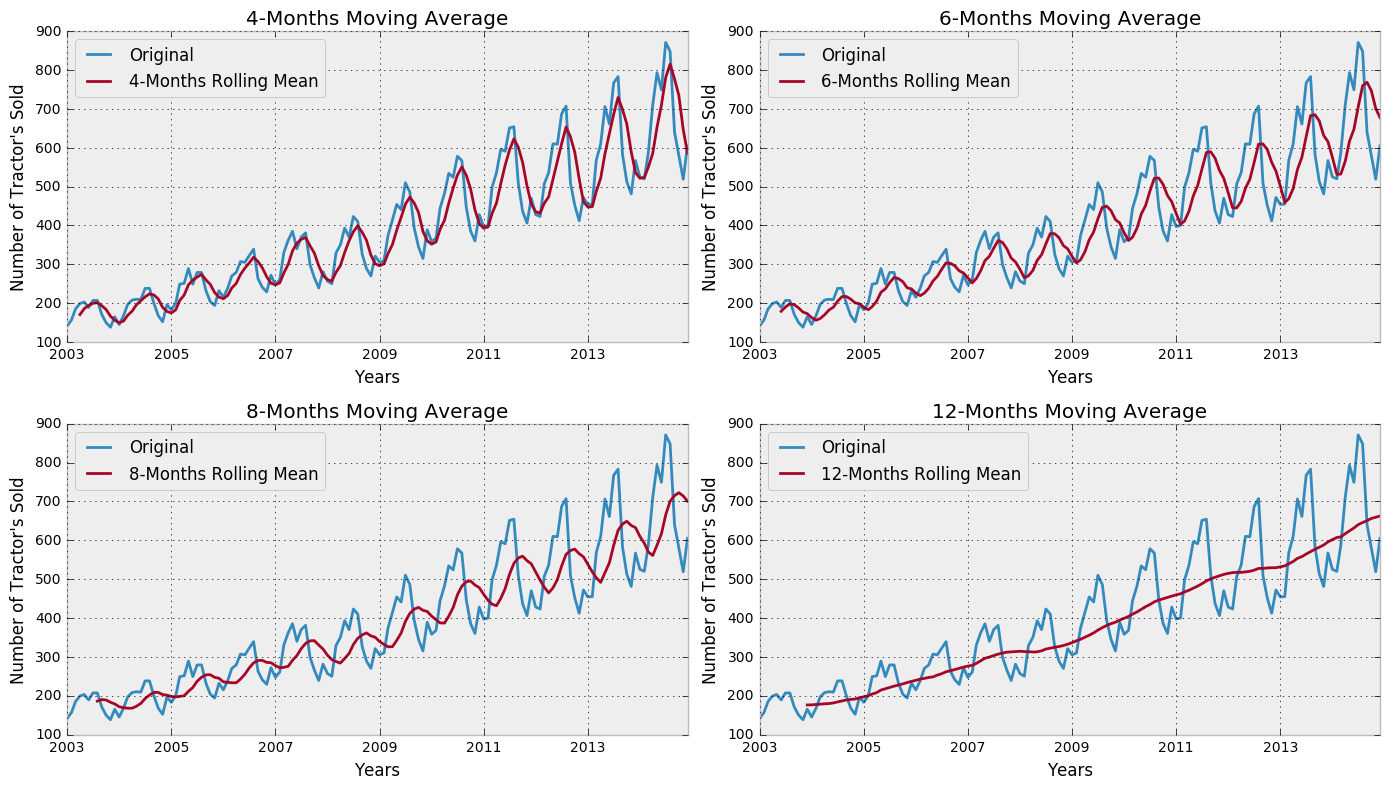

In [11]:
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)
axes[0][0].plot(sales_ts.index, sales_ts, label='Original')
axes[0][0].plot(sales_ts.index, sales_ts.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Number of Tractor's Sold")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')
axes[0][1].plot(sales_ts.index, sales_ts, label='Original')
axes[0][1].plot(sales_ts.index, sales_ts.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Number of Tractor's Sold")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')
axes[1][0].plot(sales_ts.index, sales_ts, label='Original')
axes[1][0].plot(sales_ts.index, sales_ts.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Number of Tractor's Sold")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')
axes[1][1].plot(sales_ts.index, sales_ts, label='Original')
axes[1][1].plot(sales_ts.index, sales_ts.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Number of Tractor's Sold")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')
plt.tight_layout()
plt.show()

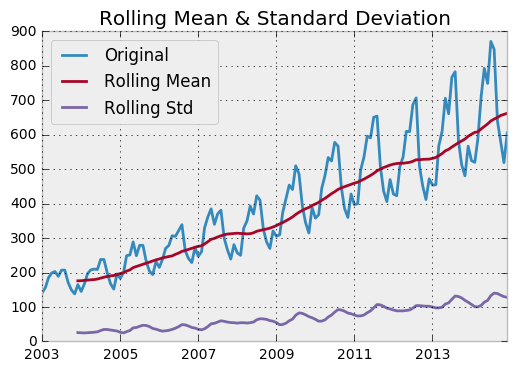

In [12]:
#Determing rolling statistics
rolmean = sales_ts.rolling(window=12).mean()
rolstd = sales_ts.rolling(window=12).std()

#Plot rolling statistics:
orig = plt.plot(sales_ts, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [13]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   1.108825
p-value                          0.995291
#lags Used                      14.000000
Number of Observations Used    129.000000
Critical Value (10%)            -2.578864
Critical Value (1%)             -3.482088
Critical Value (5%)             -2.884219
dtype: float64


In [14]:
monthly_sales_data = pd.pivot_table(sales_data, values = "Tractor-Sales", columns = "Year", index = "Month")
monthly_sales_data = monthly_sales_data.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_sales_data

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Month,,,,,,,,,,,,
Jan,141,145,183,215,247,257,305,358,397,428,454,525
Feb,157,168,200,239,261,250,310,368,400,423,455,520
Mar,185,197,249,270,330,329,374,444,498,507,568,587
Apr,199,208,251,279,362,350,414,482,536,536,610,710
May,203,210,289,307,385,393,454,534,596,610,706,793
Jun,189,209,249,305,340,370,441,524,591,609,661,749
Jul,207,238,279,322,370,423,510,578,651,687,767,871
Aug,207,238,279,339,381,410,486,567,654,707,783,848
Sep,171,199,232,263,299,326,393,447,509,509,583,640


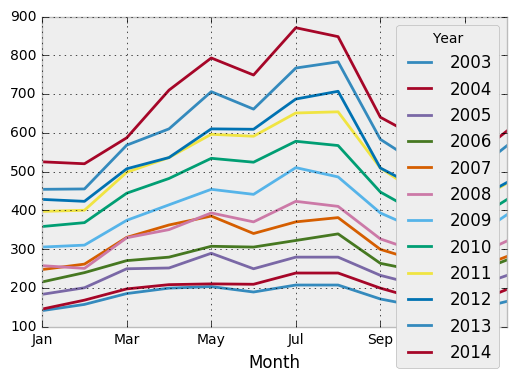

In [15]:
monthly_sales_data.plot()

In [16]:
yearly_sales_data = pd.pivot_table(sales_data, values = "Tractor-Sales", columns = "Month", index = "Year")
yearly_sales_data = yearly_sales_data[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
yearly_sales_data

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2003,141,157,185,199,203,189,207,207,171,150,138,165
2004,145,168,197,208,210,209,238,238,199,168,152,196
2005,183,200,249,251,289,249,279,279,232,204,194,232
2006,215,239,270,279,307,305,322,339,263,241,229,272
2007,247,261,330,362,385,340,370,381,299,266,239,281
2008,257,250,329,350,393,370,423,410,326,289,270,321
2009,305,310,374,414,454,441,510,486,393,345,315,389
2010,358,368,444,482,534,524,578,567,447,386,360,428
2011,397,400,498,536,596,591,651,654,509,437,406,470


C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  app.launch_new_instance()


{'boxes': [<matplotlib.lines.Line2D at 0x1d22ff07860>,
 'caps': [<matplotlib.lines.Line2D at 0x1d22ff0fc50>,
 'fliers': [<matplotlib.lines.Line2D at 0x1d22ff18ba8>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1d22ff14cc0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x1d22ff07b00>,
  <matplotlib.lines.Line2D at 0x1d22ffe1ef0>]}

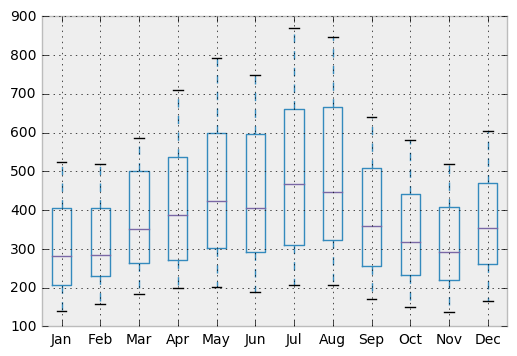

In [17]:
if __name__ == '__main__':
    return_type='dict'
yearly_sales_data.boxplot()

In [18]:
decomposition = sm.tsa.seasonal_decompose(sales_ts, model='multiplicative')

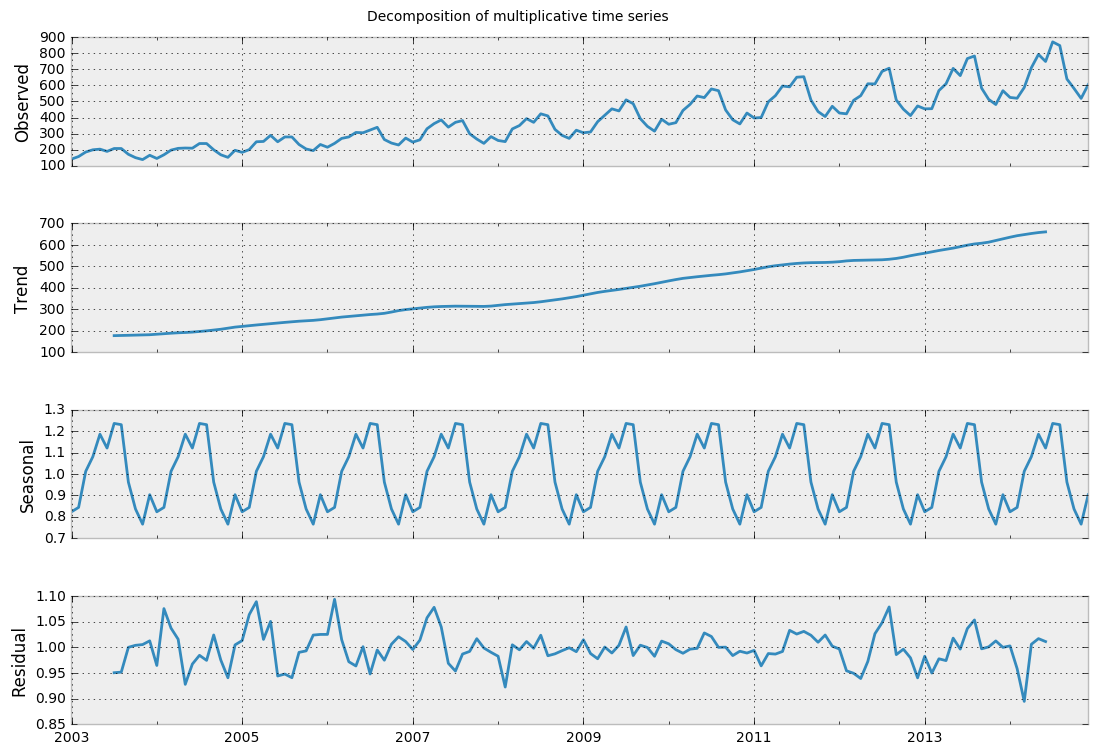

In [19]:
fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

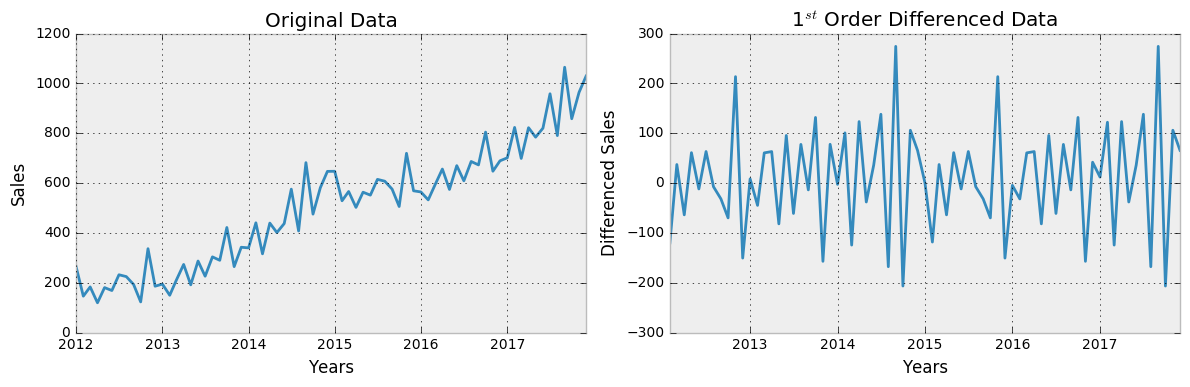

In [20]:
# convert to a dataframe for easy plot and differenciation

url = 'http://ucanalytics.com/blogs/wp-content/uploads/2017/08/dummy-sales.csv'
s = requests.get(url).text

random_df = pd.read_csv(StringIO(s))

random_df.set_index(pd.date_range(start='2012-01-01', freq='MS', periods=len(random_df)), inplace=True)

fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
axes[0].plot(random_df.index, random_df['Sales'])
axes[0].set_xlabel("Years")
axes[0].set_ylabel("Sales")
axes[0].set_title("Original Data")
axes[1].plot(random_df.index, random_df['Sales'].diff(periods=1))
axes[1].set_xlabel("Years")
axes[1].set_ylabel("Differenced Sales")
axes[1].set_title("1$^{st}$ Order Differenced Data")
plt.tight_layout()
plt.show()

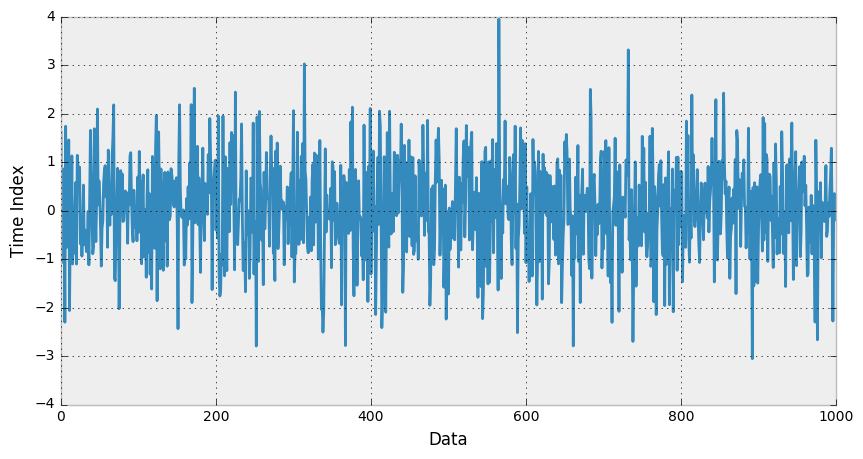

In [21]:
# generate white noise
np.random.seed(1)
# plot of discrete white noise
plt.figure(figsize=(10, 5))
white_noise = np.random.normal(size=1000)
plt.plot(white_noise)
plt.xlabel('Data')
plt.ylabel('Time Index')
plt.show()

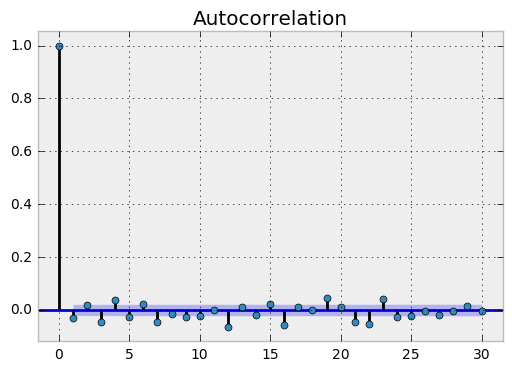

In [22]:
plt.figure()
smt.graphics.plot_acf(white_noise, lags=30, alpha=0.5)
plt.show()

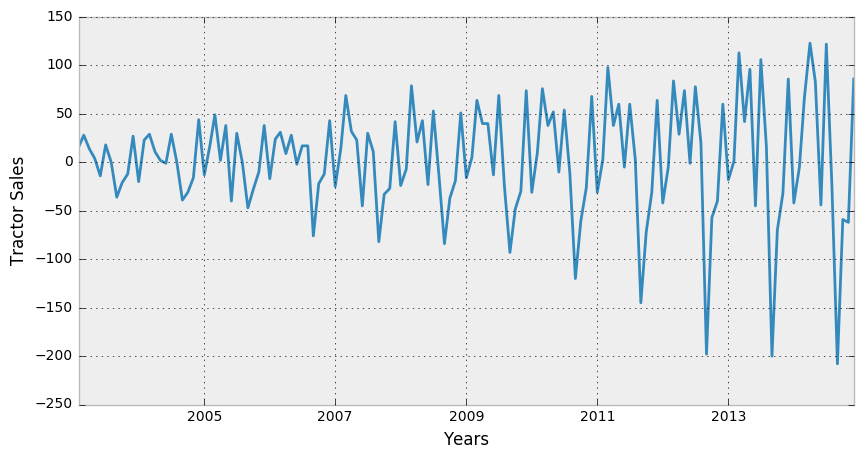

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(sales_ts.diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Tractor Sales')

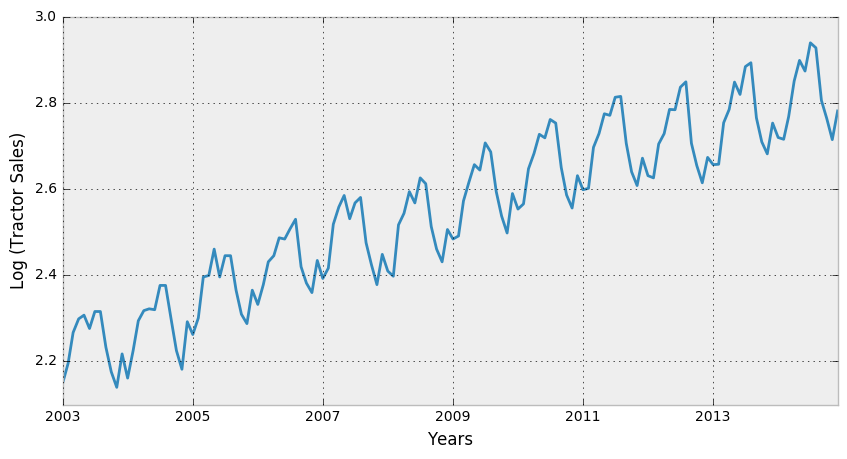

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(np.log10(sales_ts))
plt.xlabel('Years')
plt.ylabel('Log (Tractor Sales)')

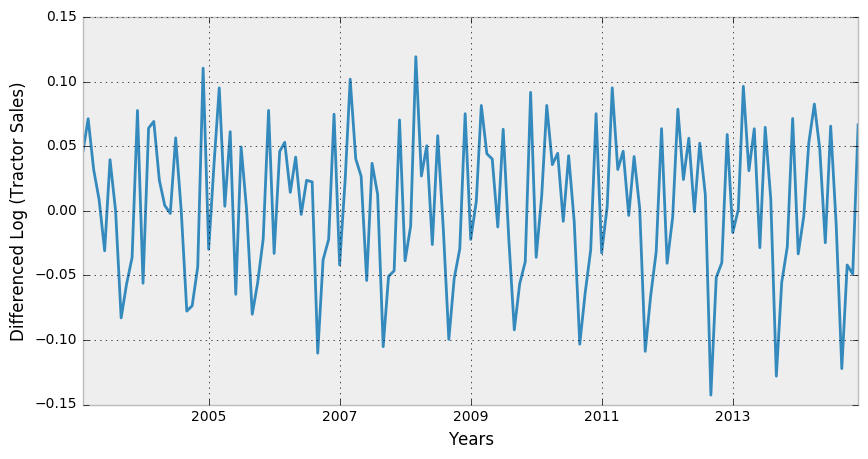

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(np.log10(sales_ts).diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Differenced Log (Tractor Sales)')

In [26]:
sales_ts_log = np.log10(sales_ts)
sales_ts_log.dropna(inplace=True)

sales_ts_log_diff = sales_ts_log.diff(periods=1) # same as ts_log_diff = ts_log - ts_log.shift(periods=1)
sales_ts_log_diff.dropna(inplace=True)

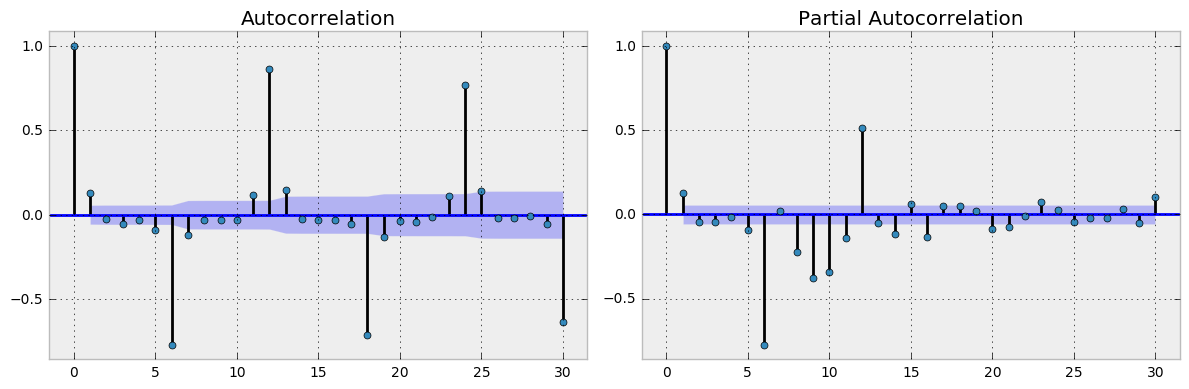

In [27]:
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(sales_ts_log_diff, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(sales_ts_log_diff, lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()

In [28]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [29]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [30]:
import sys
warnings.filterwarnings("ignore") # specify to ignore warning messages

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(sales_ts_log,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True,
                                             enforce_invertibility=True)
            results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(1, 1, 0)x(1, 0, 1, 12)12 model - AIC:-732.7309799095444


In [31]:
# comparing our model with the best model reported in the blog
blog_param_order = (0, 1, 1)
blog_param_seasonal_order = (0, 1, 1, 12)
blog_model = sm.tsa.statespace.SARIMAX(sales_ts_log,
                                      order=blog_param_order,
                                      seasonal_order=blog_param_seasonal_order,
                                      enforce_stationarity=True,
                                      enforce_invertibility=True)
blog_results = blog_model.fit()
print("Blog SARIMAX{}x{}12 model - AIC:{}".format(blog_param_order, blog_param_seasonal_order, blog_results.aic))

Blog SARIMAX(0, 1, 1)x(0, 1, 1, 12)12 model - AIC:-702.779901666343


In [32]:
best_model = sm.tsa.statespace.SARIMAX(sales_ts_log,
                                      order=(0, 1, 1),
                                      seasonal_order=(1, 0, 1, 12),
                                      enforce_stationarity=True,
                                      enforce_invertibility=True)
best_results = best_model.fit()

In [33]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                                 Statespace Model Results                                 
Dep. Variable:                      Tractor-Sales   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 369.768
Date:                            Wed, 30 Aug 2017   AIC                           -731.536
Time:                                    21:13:05   BIC                           -719.656
Sample:                                01-01-2003   HQIC                          -726.708
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3408      0.069     -4.958      0.000      -0.476      -0.206
ar.S.L12       0.9855      0.009   

In [34]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2012-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

In [35]:
# Extract the predicted and true values of our time series
sales_ts_forecasted = pred_dynamic.predicted_mean
sales_ts_truth = sales_ts_log['2012-01-01':]

# Compute the mean square error
mse = ((sales_ts_forecasted - sales_ts_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))

The Mean Squared Error of our forecasts is 0.0009


In [38]:
pred_dynamic_ci.head()

,lower Tractor-Sales,upper Tractor-Sales
2012-01-01,2.612991,2.677175
2012-02-01,2.613066,2.689940
2012-03-01,2.696145,2.783891
2012-04-01,2.724197,2.821611
2012-05-01,2.763107,2.869311


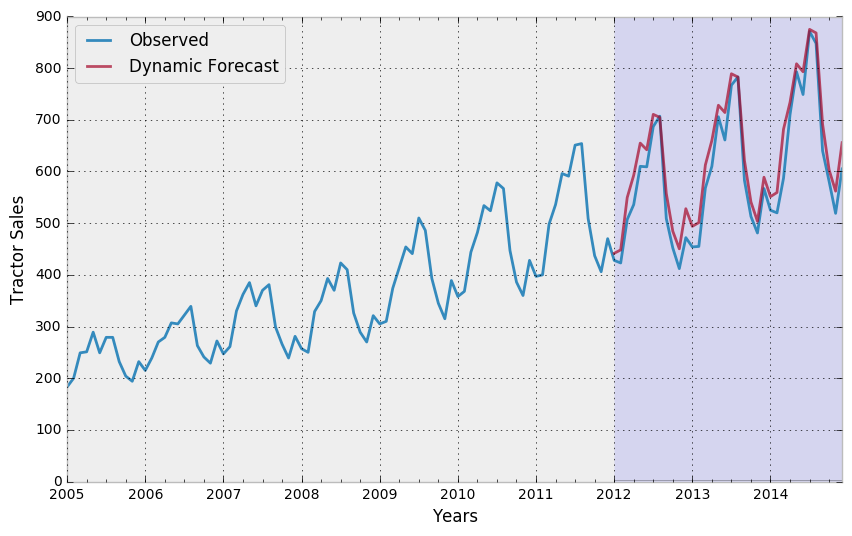

In [36]:
axis = sales_ts['2005':].plot(label='Observed', figsize=(10, 6))
np.power(10, pred_dynamic.predicted_mean).plot(ax=axis, label='Dynamic Forecast', alpha=0.7)
axis.fill_between(pred_dynamic_ci.index, pred_dynamic_ci.iloc[:, 0], pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)
axis.fill_betweenx(axis.get_ylim(), pd.to_datetime('2012-01-01'), sales_ts.index[-1], alpha=.1, zorder=-1)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [40]:
# Get forecast 36 steps (3 years) ahead in future
n_steps = 36
pred_uc_99 = best_results.get_forecast(steps=36, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=36, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [41]:
n_steps = 36
idx = pd.date_range(sales_ts.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2014-12-01,567.597155,527.166727,611.128347,527.166727,611.128347
2015-01-01,565.248241,517.371401,617.555539,517.371401,617.555539
2015-02-01,662.169426,598.543670,732.558660,598.543670,732.558660
2015-03-01,753.443289,673.509730,842.863532,673.509730,842.863532
2015-04-01,847.359879,749.835377,957.568536,749.835377,957.568536


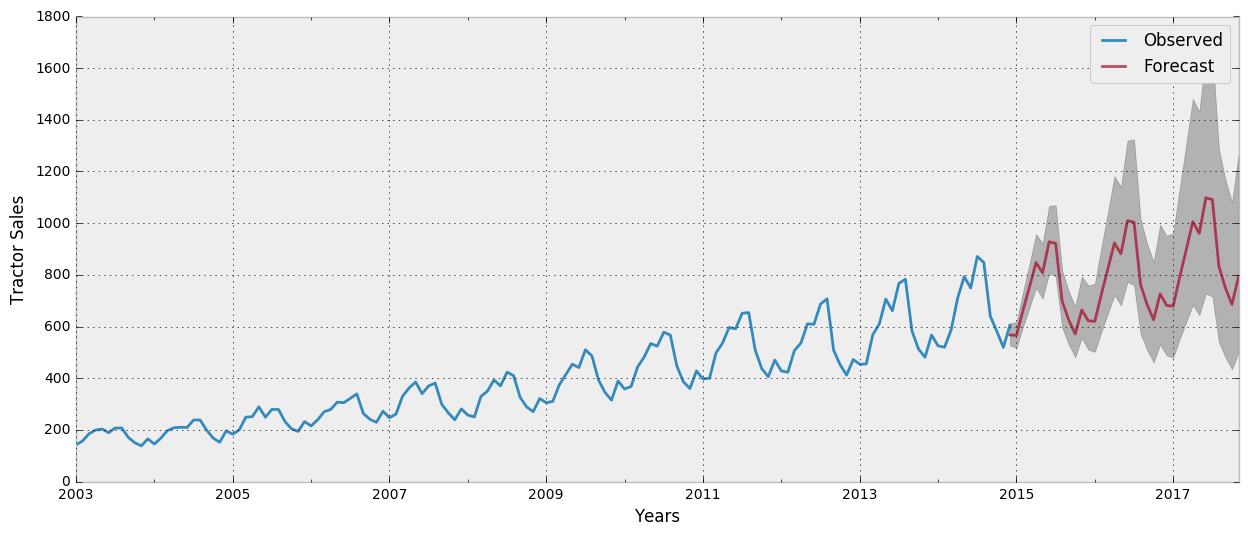

In [42]:
# plot the forecast along with the confidence band
axis = sales_ts.plot(label='Observed', figsize=(15, 6))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.25)
#axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.75)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()

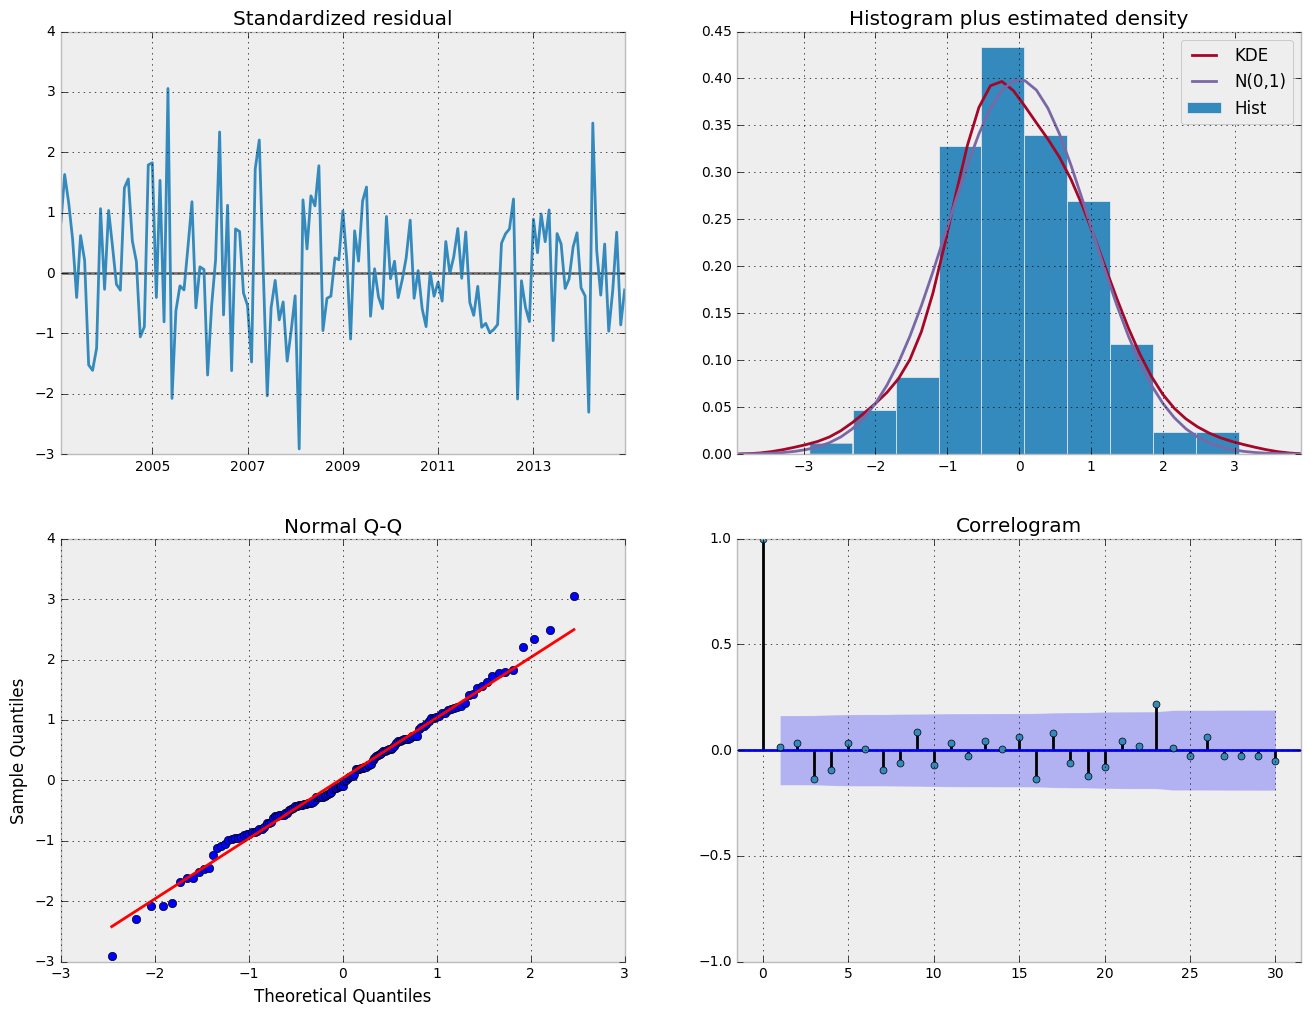

In [43]:
best_results.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()

In [44]:
url = 'http://ucanalytics.com/blogs/wp-content/uploads/2017/08/sales-and-marketing.csv'
s = requests.get(url).text

mkt_sales_data = pd.read_csv(StringIO(s))

# since the complete date was not mentioned, we assume that it was the first of every month
mkt_sales_data.set_index(pd.date_range(start='2011-01-01', freq='MS', periods=len(mkt_sales_data)), inplace=True)
mkt_sales_data.drop(['Time Period'], axis=1, inplace=True)
mkt_sales_data.rename(columns={'Sales':'Tractor-Sales'}, inplace=True)
mkt_sales_data.head(5)

,Tractor-Sales,Marketing Expense
2011-01-01,397,486.64
2011-02-01,400,501.80
2011-03-01,498,437.09
2011-04-01,536,565.16
2011-05-01,596,744.15


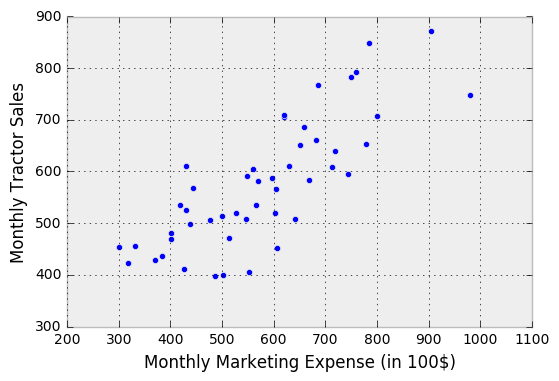

In [46]:
plt.figure()
plt.scatter(x=mkt_sales_data['Marketing Expense'], y=mkt_sales_data['Tractor-Sales'])
plt.xlabel('Monthly Marketing Expense (in 100$)')
plt.ylabel('Monthly Tractor Sales')

In [47]:
print("Correlation for Marketing Data: {}".format(round(mkt_sales_data.corr()['Marketing Expense']['Tractor-Sales'], 2)))

Correlation for Marketing Data: 0.8


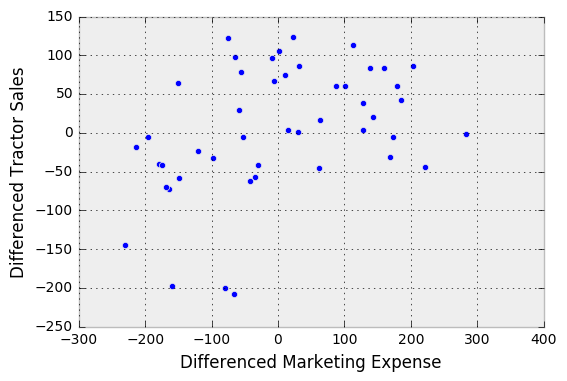

In [48]:
mkt_sales_data_diff = mkt_sales_data.diff(periods=1)
mkt_sales_data_diff.dropna(inplace=True)

plt.figure()
plt.scatter(x=mkt_sales_data_diff['Marketing Expense'], y=mkt_sales_data_diff['Tractor-Sales'])
plt.xlabel('Differenced Marketing Expense')
plt.ylabel('Differenced Tractor Sales')

In [49]:
print("Correlation for Stationary Data: {}".format(round(mkt_sales_data_diff.corr()['Marketing Expense']['Tractor-Sales'], 2)))

Correlation for Stationary Data: 0.41


In [50]:
prev_months_corr_data = pd.DataFrame(np.column_stack((\
                                        mkt_sales_data_diff['Marketing Expense'][0:46].values,\
                                        mkt_sales_data_diff['Tractor-Sales'][1:47].values)), \
                                     columns=["Previous Month's Differenced Marketing Expense" , 
                                              "Differenced Tractor Sales"])

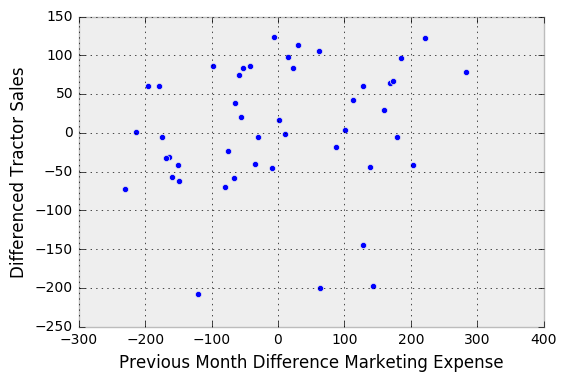

In [51]:
plt.figure()
plt.scatter(x=prev_months_corr_data["Previous Month's Differenced Marketing Expense"], \
            y=prev_months_corr_data["Differenced Tractor Sales"])
plt.xlabel("Previous Month Difference Marketing Expense")
plt.ylabel("Differenced Tractor Sales")
plt.show()

In [52]:
print(
    "Correlation of current Months's Differenced Tractor Sales with Previous Month's Differenced Marketing Expense: {}"\
    .format(round(prev_months_corr_data.corr().iloc[0,1], 2)))

Correlation of current Months's Differenced Tractor Sales with Previous Month's Differenced Marketing Expense: 0.17


In [53]:
clip_length = len(mkt_sales_data_diff)
clip_length

47

In [54]:
lagged_mkt_exp_diff_sales_data = pd.DataFrame(np.column_stack((\
                                        mkt_sales_data_diff['Marketing Expense'],\
                                        mkt_sales_data_diff['Marketing Expense'].shift(periods=1)[0:clip_length],\
                                        mkt_sales_data_diff['Marketing Expense'].shift(periods=2)[0:clip_length],\
                                        mkt_sales_data_diff['Marketing Expense'].shift(periods=3)[0:clip_length],\
                                        mkt_sales_data_diff['Tractor-Sales'][0:47].values)), \
                                     columns=["Diff_Mkt_Exp", "Diff_Mkt_Exp_Lag_1", "Diff_Mkt_Exp_Lag_2", "Diff_Mkt_Exp_Lag_3", "Diff_Sales"])

In [55]:
lagged_mkt_exp_diff_sales_data.set_index(mkt_sales_data_diff.index, inplace=True)
lagged_mkt_exp_diff_sales_data.head(10)

,Diff_Mkt_Exp,Diff_Mkt_Exp_Lag_1,Diff_Mkt_Exp_Lag_2,Diff_Mkt_Exp_Lag_3,Diff_Sales
2011-02-01,15.16,NaN,NaN,NaN,3.0
2011-03-01,-64.71,15.16,NaN,NaN,98.0
2011-04-01,128.07,-64.71,15.16,NaN,38.0
2011-05-01,178.99,128.07,-64.71,15.16,60.0
2011-06-01,-195.41,178.99,128.07,-64.71,-5.0
2011-07-01,101.47,-195.41,178.99,128.07,60.0
2011-08-01,127.30,101.47,-195.41,178.99,3.0
2011-09-01,-230.40,127.30,101.47,-195.41,-145.0
2011-10-01,-164.30,-230.40,127.30,101.47,-72.0
2011-11-01,168.75,-164.30,-230.40,127.30,-31.0


In [56]:
import sys

def auto_arima(timeseries, regressors=None, p=range(0, 2), d=range(0, 1), q=range(0, 2)):

    # Generate all different combinations of p, d and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q and q triplets
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
    
    warnings.filterwarnings("ignore") # specify to ignore warning messages

    best_aic = np.inf
    best_pdq = None
    best_seasonal_pdq = None
    best_results = None

    for param in pdq:
        for param_seasonal in seasonal_pdq:

            try:
                temp_model = sm.tsa.statespace.SARIMAX(endog=timeseries,
                                                 exog=regressors,
                                                 order = param,
                                                 seasonal_order = param_seasonal,
                                                 enforce_stationarity=True,
                                                 enforce_invertibility=True)
                temp_results = temp_model.fit()

                # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
                if temp_results.aic < best_aic:
                    best_aic = temp_results.aic
                    best_pdq = param
                    best_seasonal_pdq = param_seasonal
                    best_results = temp_results
            except:
                #print("Unexpected error:", sys.exc_info()[0])
                continue
                
                

    print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))
    print(best_results.summary().tables[0])
    print(best_results.summary().tables[1])

In [57]:
#ARIMA Model No Regressor
timeseries = lagged_mkt_exp_diff_sales_data["Diff_Sales"][3:47]
regressors = lagged_mkt_exp_diff_sales_data["Diff_Mkt_Exp"][3:47]
auto_arima(timeseries, regressors, p=range(0, 2), d=range(0, 1), q=range(0, 2))

Best SARIMAX(0, 0, 1)x(1, 0, 0, 12)12 model - AIC:443.25444780774654
                                 Statespace Model Results                                 
Dep. Variable:                         Diff_Sales   No. Observations:                   44
Model:             SARIMAX(0, 0, 1)x(1, 0, 0, 12)   Log Likelihood                -217.627
Date:                            Wed, 30 Aug 2017   AIC                            443.254
Time:                                    21:30:37   BIC                            450.391
Sample:                                05-01-2011   HQIC                           445.901
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Diff_Mkt_Exp     0.0233      0.039      0

In [58]:
#ARIMA Model with 1 month Lag Marekting Sales Data Regressor
timeseries = lagged_mkt_exp_diff_sales_data["Diff_Sales"][3:47]
regressors = lagged_mkt_exp_diff_sales_data[["Diff_Mkt_Exp", "Diff_Mkt_Exp_Lag_1"]][3:47]
auto_arima(timeseries, regressors, p=range(0, 2), d=range(0, 1), q=range(0, 2))

Best SARIMAX(0, 0, 1)x(1, 0, 0, 12)12 model - AIC:445.1400534331029
                                 Statespace Model Results                                 
Dep. Variable:                         Diff_Sales   No. Observations:                   44
Model:             SARIMAX(0, 0, 1)x(1, 0, 0, 12)   Log Likelihood                -217.570
Date:                            Wed, 30 Aug 2017   AIC                            445.140
Time:                                    21:32:40   BIC                            454.061
Sample:                                05-01-2011   HQIC                           448.448
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Diff_Mkt_Exp           0.0259 

In [59]:
#ARIMA Model with 2 months Lag Marekting Sales Data Regressor
timeseries = lagged_mkt_exp_diff_sales_data["Diff_Sales"][3:47]
regressors = lagged_mkt_exp_diff_sales_data[["Diff_Mkt_Exp", "Diff_Mkt_Exp_Lag_1", "Diff_Mkt_Exp_Lag_2"]][3:47]
auto_arima(timeseries, regressors, p=range(0, 2), d=range(0, 1), q=range(0, 2))

Best SARIMAX(0, 0, 1)x(1, 0, 0, 12)12 model - AIC:447.0778377658405
                                 Statespace Model Results                                 
Dep. Variable:                         Diff_Sales   No. Observations:                   44
Model:             SARIMAX(0, 0, 1)x(1, 0, 0, 12)   Log Likelihood                -217.539
Date:                            Wed, 30 Aug 2017   AIC                            447.078
Time:                                    21:32:56   BIC                            457.783
Sample:                                05-01-2011   HQIC                           451.048
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Diff_Mkt_Exp           0.0236 

In [60]:
#ARIMA Model with 3 months Lag Marekting Sales Data Regressor
timeseries = lagged_mkt_exp_diff_sales_data["Diff_Sales"][3:47]
regressors = lagged_mkt_exp_diff_sales_data[["Diff_Mkt_Exp", "Diff_Mkt_Exp_Lag_1", "Diff_Mkt_Exp_Lag_2", "Diff_Mkt_Exp_Lag_3"]][3:47]
auto_arima(timeseries, regressors, p=range(0, 2), d=range(0, 1), q=range(0, 2))

Best SARIMAX(1, 0, 0)x(1, 0, 0, 12)12 model - AIC:447.4032016006858
                                 Statespace Model Results                                 
Dep. Variable:                         Diff_Sales   No. Observations:                   44
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood                -216.702
Date:                            Wed, 30 Aug 2017   AIC                            447.403
Time:                                    21:33:10   BIC                            459.893
Sample:                                05-01-2011   HQIC                           452.035
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Diff_Mkt_Exp           0.0111 